<h1 style="color:#ffc0cb;font-size:70px;font-family:Georgia;text-align:center;"><strong>Assignment 3</strong></h1>

Comprehensive data preparation, exploration, visualization, feature engineering, and classification modeling for a case study: Predict house price range in Hanoi 2019 and 2020 periods.


<b> Group: 10</b>
+ Student Name: Nguyen Dang Huynh Chau (s3777214)</b>
+ Student Name: Tran Ngoc Anh Thu (s3879312)</b>
+ Student Name: Ho Le Minh Thach (s3879312)</b>
+ Lecturer: Vo Ngoc Yen Nhi </b>

Having played a vital role in the human-being life, housing is one of the greatest considerations and its price has been researched carefully in millions of studies by using machine learning. Although, this is not the rare topic, it is still necessary to construct a machine learning model in order to not only predict an accurate housing price but also have the user-friendliness for the users to have the most optimised and effective way to investigate the housing price for improving the living standard.

# Hypothesis forming:


<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>Table of Content</strong></h1>

### 1. [General Requirement](#1)

1.1 [Overview](#1.1)

1.2 [Required  Libraries](#1.2)

<br>

### 2. [Data Preparation & Data exploration (EDA)](#2)

2.1 [Data Preparation](#2.1)

2.2 [Check data types & Make the data homogeneous](#2.2)

2.3 [Missing Values](#2.3)
+ [Guess the missingness type](#2.3.1)
+ [Drop missing values pairwise for df and validation set by deleting their rows](#2.3.2)
+ [Drop missing values listwise for all the datasets by deleting their columns](#2.3.3)
+ [Interpolate() - Nearest Value imputation for Weather_Timestamp](#2.3.4)
+ [Median & Frequent Categorical Imputation for Weather Continuous features](#2.3.5)
+ [Impute Median and Mode for the rest- assume that there is random order of missing values](#2.3.6)

2.4 [Shorten and Simplify categories](#2.4)
+ [2.4.1 Time-series columns - break them down into hour, minute, and weekday](#2.4.1)
+ [2.4.2 Shorten & Simplify the Wind Direction](#2.4.2)

2.5 [Typos](#2.5)
+ [2.5.1 Check for typos in the dataset](#2.5.1)
+ [2.5.2 Extra-whitespaces](#2.5.2)
+ [2.5.3 Lower-case all values in each column](#2.5.3)

2.6 [Sanity checks](#2.6)
+ [2.6.1 Check duplication](#2.6.1)
+ [2.6.2 Impossible values](#2.6.2)

2.7 [Extra exploration and visualization](#2.7)
+ [2.7.1 Medium distance by severity bar chart](#2.7.1)
+ [2.7.2 Top 10 states having the most accidents bar chart](#2.7.2)
+ [2.7.3 Longtitude and Latitude Scatterplot](#2.7.3)
+ [2.7.4 Most frequent POI Attributes of an accident with severity bar chart](#2.7.4)

<br>

### 3. [Feature Engineering](#3)
3.1 [Data Correlation - Quantify the association of features and accidents](#3.1)

3.2 [Gaussian Distributions - Box Cox OR Log Transformation of skewed features](#3.2)

3.3 [Assumptions of Regression](#3.3)

3.4 [Multicollinearity of Features](#3.4)

3.5 [Drop multicollinearity features and high p-value](#3.5)

3.6 [Encoding](#3.6)

3.7 [Check OLS stats model - Multivariate - Interpretation of the Model Coefficient, the P-value, the R-squared](#3.7)

3.8 [df - Test - Validation Sets](#3.8)

3.9 [Feature scaling](#3.9)

<br>

### 4. [Model dfing](#4)

<br>

### 5. [Model comparison and export](#5)

<br>

### 6. [Summary](#6)

<br>

### 7. [References](#7)

<br>

### 8. [Appendix](#8)

<hr>

<a id="1"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>1. Data Preparation</strong></h1>

<a id="1.1"></a>
# 1.1 Importing Necessary Libraries and datasets

In [1]:
# Install a conda package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install missingno
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install xgboost
!{sys.executable} -m pip install statsmodels
!{sys.executable} -m pip install wordcloud
!{sys.executable} -m pip install imbalanced-learn



# work with data in tabular representation
from datetime import time

import pandas as pd
# round the data in the correlation matrix
import numpy as np
# module for regular expression
import re

# encoding
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder


# Modules for data visualization
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from scipy.stats import skew  # for some statistics
import matplotlib.style as style
from xgboost import sklearn
import statsmodels.api as sm

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

plt.rcParams['figure.figsize'] = [6, 6]

# Ensure that our plots are shown and embedded within the Jupyter notebook itself. Without this command, sometimes plots may show up in pop-up windows
%matplotlib inline

# run a python file
# %run function.py

# overwrite the style of all the matplotlib graphs
sns.set()

# ignore DeprecationWarning Error Messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# check the version of the packages
print("Numpy version: ", np.__version__)
print("Pandas version: ",pd.__version__)

Numpy version:  1.20.1
Pandas version:  1.2.4


# Data Retrieving
***
In order to load data properly, the data in csv file have to be examined carefully. First of all, all the categories are seperated by the "," and strip the extra-whitespaces at the begin by setting "skipinitialspace = True".

In [3]:
%time
# import test dataset
df = pd.read_csv('Data/VN_housing_dataset.csv', delimiter=',', skipinitialspace = True)

# drop Unnamed, it is just a number given to identify each house
df.drop('Unnamed: 0', 1, inplace=True)
df.head(3)

Wall time: 0 ns


,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²"
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²"
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²


## Rename column
***
Since these columns are in Vietnamese so translate into English will be more straightforward in later process. We will also analyse the column meaning:
- The 'Ngày' will be the date which will contain all the day, month, year value
- The 'Địa chỉ' will be the address which contains the street, ward, district, city
- The 'Quận' is district
- The 'Huyện' is not suppose to be the ward. However, the content they have is actually the ward
- The 'Loại hình nhà ở' is a type of house which depends on the location such as villa, house in the main street, house in the alley, or townhouse.
- The 'Giấy tờ pháp lý' is the legal document either already have, or on waiting, or others documents.
- The 'Số tầng' is the number of floor
- The 'Số phòng ngủ' is the number of bedroom
- The 'Diện tích' is the area unit in meter square
- The 'Dài' is the length unit in meter
- The 'Rộng' is the width unit in meter
- The 'Giá/m2' is the price in million VND per meter square

In [4]:
df.columns = [
    'Date', 'Address', 'District',
    'Ward', 'House_type', 'Legal_documents', 
    'No_floor', 'No_bedroom', 'Area', 'Length', 'Width', 'Price']
df.head(3)

,Date,Address,District,Ward,House_type,Legal_documents,No_floor,No_bedroom,Area,Length,Width,Price
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²"
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²"
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²


<a id="2"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>2. Data Cleaning</strong></h1>

## About This Dataset
***

Now let's go through the features and describe a little:
***
**Categorical:**
- **Nominal**
    > - **Address**: a string describe full address of the house in Hanoi 
    > - **District**: a string describe the district the house is located
    > - **Ward**: a string describe the ward the house is located
    > - **Housing_type**: a string describe the type of house including byroad, street house, villa, townhouse
    > - **Legal_documents**: a string describe the status of legal documents including available, on waiting, others
- **Ordinal**
    > - **No_room**: a string describe the number of bedroom in the house
    > - **No_floor**: a string describe the house's floor quantity
***
**Numeric:**
- **Continuous**
  >  - **Area**: a string describe the area of the house in meter square
  >  - **Length**: a string describe the length of the house's area in meter
  >  - **Width**: a string describe the width of the house's area in meter
  >  - **Price**: a string describe the cost in million VND of each meter square
***
**Date/time:**
- **Date**(Nominal variable): a string describe the date the house is upload on alonhadat.com.vn

## Data types
***

### Format date features

In [5]:
# Now let's create new features from date column

# Cast date columns to the Date data type
df['Date'] = pd.to_datetime(df['Date'])

# Show days of the week into a separated column
df['Day_Of_Week'] = df['Date'].dt.day_name()

# Cast Date columns to the string data type in order to slice data later
df['Date'] = df['Date'].astype(str)

# slice the column to get the year and month in a new column
def get_years(df, column):
    return df[column].apply(lambda date: date[0:4])

def get_months(df, column):
    return df[column].apply(lambda date: date[5:7])

# get the month and year
df['Month'] = get_months(df, 'Date')
df['Year'] = get_years(df, 'Date')

# Drop original columns
df = df.drop(['Date'], axis=1)

df.head(3)

,Address,District,Ward,House_type,Legal_documents,No_floor,No_bedroom,Area,Length,Width,Price,Day_Of_Week,Month,Year
0,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²",Wednesday,08,2020
1,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²",Wednesday,08,2020
2,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²,Wednesday,08,2020


We will process the column 'Area', 'Length', 'Width' and 'Price' and turn it into a conitnuous numerical value. Firstly we will remove all the unit of each column, and then we will replace ',' to '.' for the price column because the string need to be in the correct format before convert to float value. Then we will convert those columns into numerical value.

In [6]:
# remove the unit
df['Area'] = df['Area'].replace('\sm²', '', regex=True)
df['Length'] = df['Length'].replace('\sm', '', regex=True)
df['Width'] = df['Width'].replace('\sm', '', regex=True)
df['Price'] = df['Price'].replace('\striệu/m²', '', regex=True).replace(',', '.', regex=True)

# df is the DataFrame, and column_list is a list of columns as strings
def coerce_df_columns_to_numeric(df, column_list):
    df[column_list] = df[column_list].apply(pd.to_numeric, errors='coerce')
    return df.dtypes

# convert the value into float for all the column 'Area', 'Length', 'Width', 'Price'
coerce_df_columns_to_numeric(df, ['Area','Length', 'Width', 'Price'])

Address             object
District            object
Ward                object
House_type          object
Legal_documents     object
No_floor            object
No_bedroom          object
Area               float64
Length             float64
Width              float64
Price              float64
Day_Of_Week         object
Month               object
Year                object
dtype: object

### Remove prefix & Typo check
We will process column 'District', 'Ward' by removing its repeative prefix. This will help us extract only the name of the district and ward.

In [7]:
# remove the prefix to only extract the district name
df['District'] = df['District'].replace('Quận\s', '', regex=True)

# print out list of District types
print(f'NUMBER OF CATEGORIES: {df.District.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.District.unique()}\n\n\n')

NUMBER OF CATEGORIES: 29; 

UNIQUE NAMES OF THE CATEGORIES ['Cầu Giấy' 'Thanh Xuân' 'Hai Bà Trưng' 'Tây Hồ' 'Đống Đa' 'Hà Đông'
 'Huyện Thanh Trì' 'Hoàng Mai' 'Long Biên' 'Hoàn Kiếm' 'Nam Từ Liêm'
 'Ba Đình' 'Huyện Hoài Đức' 'Bắc Từ Liêm' 'Huyện Đan Phượng'
 'Huyện Thanh Oai' 'Huyện Sóc Sơn' 'Huyện Gia Lâm' 'Huyện Chương Mỹ'
 'Huyện Đông Anh' 'Huyện Thường Tín' 'Thị xã Sơn Tây' 'Huyện Mê Linh'
 'Huyện Thạch Thất' 'Huyện Quốc Oai' 'Huyện Phúc Thọ' 'Huyện Phú Xuyên'
 'Huyện Ba Vì' nan 'Huyện Mỹ Đức']





In [8]:
# remove the prefix to only extract the ward name
df['Ward'] = df['Ward'].replace('Phường\s', '', regex=True)
df['Ward'] = df['Ward'].replace('Xã\s', '', regex=True)

# print out list of Ward types
print(f'NUMBER OF CATEGORIES: {df.Ward.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.Ward.unique()}\n\n\n')

NUMBER OF CATEGORIES: 305; 

UNIQUE NAMES OF THE CATEGORIES ['Nghĩa Đô' 'Kim Giang' 'Minh Khai' 'Thụy Khuê' 'Yên Hoà' 'Trung Liệt'
 'Đống Mác' 'Xuân La' 'Văn Quán' 'Thị trấn Văn Điển' 'Định Công' 'Bồ Đề'
 'Quang Trung' 'Thanh Lương' 'Khương Trung' 'Phúc Tân' 'Gia Thụy'
 'Khương Đình' 'Phương Canh' 'Tương Mai' 'La Khê' 'Mễ Trì' 'Khương Mai'
 'Láng Hạ' 'Quan Hoa' 'Tây Mỗ' 'Ngọc Khánh' 'Đại Mỗ' 'Tả Thanh Oai'
 'Mỹ Đình 1' 'Tam Hiệp' 'Cống Vị' 'Bách Khoa' 'Vĩnh Phúc' 'Kim Chung'
 'Đại Kim' 'Mai Động' 'Trung Tự' 'Kiến Hưng' 'Trúc Bạch' 'Cổ Nhuế 1'
 'Đức Giang' 'Mỹ Đình 2' 'Bưởi' 'Ô Chợ Dừa' 'Long Biên' 'Hoàng Văn Thụ'
 'Mai Dịch' 'Nhân Chính' 'Vạn Phúc' 'Ngọc Hà' 'Lĩnh Nam' 'Xuân Đỉnh'
 'Phú Đô' 'Liễu Giai' 'Thị trấn Phùng' 'Kim Liên' 'Phúc Diễn' 'Kim Mã'
 'Trung Phụng' 'Tân Mai' 'Cầu Diễn' 'Ngã Tư Sở' 'Trung Văn' 'Thượng Đình'
 'Hoàng Liệt' 'Thịnh Liệt' 'Quốc Tử Giám' 'Khâm Thiên' 'Trương Định'
 'Phú Diễn' 'Thạch Bàn' 'Ngọc Thụy' 'Cầu Dền' 'Phú Lương' 'Bạch Đằng'
 'Phú La' 'Hà Cầu' 'Láng T

After cleaning the address, we will look at the remaining categories column. We will look at their unique value, and replace Vietnamese by English term for further process. We also remove prefix in column 'No_floor' and 'No_room'.

In [9]:
# print out list of House_type types
print(f'NUMBER OF CATEGORIES: {df.House_type.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.House_type.unique()}\n\n\n')

NUMBER OF CATEGORIES: 4; 

UNIQUE NAMES OF THE CATEGORIES ['Nhà ngõ, hẻm' 'Nhà mặt phố, mặt tiền' 'Nhà biệt thự' 'Nhà phố liền kề'
 nan]





In [10]:
# print out list of Legal_documents types
print(f'NUMBER OF CATEGORIES: {df.Legal_documents.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.Legal_documents.unique()}\n\n\n')

NUMBER OF CATEGORIES: 3; 

UNIQUE NAMES OF THE CATEGORIES ['Đã có sổ' nan 'Đang chờ sổ' 'Giấy tờ khác']





In [11]:
# print out list of No_floor types
print(f'NUMBER OF CATEGORIES: {df.No_floor.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.No_floor.unique()}\n\n\n')

NUMBER OF CATEGORIES: 29; 

UNIQUE NAMES OF THE CATEGORIES ['4' nan '6' '5' '7' '2' '3' '8' '1' '9' '50' '38' '35' '10'
 'Nhiều hơn 10' '45' '33' '42' '25' '73' '12' '65' '55' '30' '14' '40'
 '52' '54' '32' '29']





As you can see, we need to remove the suffix in the column No_bedroom

In [12]:
df['No_bedroom'] = df['No_bedroom'].replace('\sphòng', '', regex=True)

# print out list of No_bedroom types
print(f'NUMBER OF CATEGORIES: {df.No_bedroom.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.No_bedroom.unique()}\n\n\n')

NUMBER OF CATEGORIES: 11; 

UNIQUE NAMES OF THE CATEGORIES ['5' '3' '4' '6' 'nhiều hơn 10' '8' '2' '7' '9' '1' '10' nan]





### Translate the content
We will now translate the content of these 4 columns. As you can see the house type will have 4 values including byroad, street house, villa, and townhouse. These are the finnest word that we can find to clearly represent the meaning in Vietnamese. Similarly for the column legal documents where it will has 3 values including available, waiting, and others. For the No_floor and No_bedroom, we translate the word greater than 10 value.

In [13]:
# Translate the content from Vietnamese into English

df['House_type'].replace('Nhà ngõ, hẻm', 'byroad', inplace=True)
df['House_type'].replace('Nhà mặt phố, mặt tiền', 'street_house', inplace=True)
df['House_type'].replace('Nhà biệt thự', 'villa', inplace=True)
df['House_type'].replace('Nhà phố liền kề', 'townhouse', inplace=True)

df['Legal_documents'].replace('Đã có sổ', 'available', inplace=True)
df['Legal_documents'].replace('Đang chờ sổ', 'waiting', inplace=True)
df['Legal_documents'].replace('Giấy tờ khác', 'others', inplace=True)

df['No_floor'].replace('Nhiều hơn 10', 'greater_than_10', inplace=True)

df['No_bedroom'].replace('nhiều hơn 10', 'greater_than_10', inplace=True)

df.head(3)

,Address,District,Ward,House_type,Legal_documents,No_floor,No_bedroom,Area,Length,Width,Price,Day_Of_Week,Month,Year
0,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Cầu Giấy,Nghĩa Đô,byroad,available,4,5,46.0,NaN,NaN,86.96,Wednesday,08,2020
1,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Thanh Xuân,Kim Giang,street_house,NaN,NaN,3,37.0,NaN,NaN,116.22,Wednesday,08,2020
2,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Hai Bà Trưng,Minh Khai,byroad,available,4,4,40.0,10.0,4.0,65.00,Wednesday,08,2020


### Upper Case the content
In this section we will convert all the string value in the column to uppercase for further processing and keep all the string uniformly format. This will improve the analysis of the data, and also easier to perform any function related to the string. 

In [14]:
# Cast all values inside the dataframe (except the columns' name) into upper case.
df = df.applymap(lambda s: s.upper() if type(s) == str else s)
df.head(3)

,Address,District,Ward,House_type,Legal_documents,No_floor,No_bedroom,Area,Length,Width,Price,Day_Of_Week,Month,Year
0,"ĐƯỜNG HOÀNG QUỐC VIỆT, PHƯỜNG NGHĨA ĐÔ, QUẬN C...",CẦU GIẤY,NGHĨA ĐÔ,BYROAD,AVAILABLE,4,5,46.0,NaN,NaN,86.96,WEDNESDAY,08,2020
1,"ĐƯỜNG KIM GIANG, PHƯỜNG KIM GIANG, QUẬN THANH ...",THANH XUÂN,KIM GIANG,STREET_HOUSE,NaN,NaN,3,37.0,NaN,NaN,116.22,WEDNESDAY,08,2020
2,"PHỐ MINH KHAI, PHƯỜNG MINH KHAI, QUẬN HAI BÀ T...",HAI BÀ TRƯNG,MINH KHAI,BYROAD,AVAILABLE,4,4,40.0,10.0,4.0,65.00,WEDNESDAY,08,2020


## Missing values
Missing values can cause a lot of unexpected problems such as not reducing the power of a model, but also the negatively affect the performance of the studies and analysis of that data. Hence, it is important to deal with missing data. First step is to check the number of missing values of each column and fill in with the appropriate values. 

Missing values in the dataframe in descending: 
                  Total  Percent
Length           62670    75.97
Width            47052    57.03
No_floor         46098    55.88
Legal_documents  28887    35.02
Price              871     1.06
Address             48     0.06
Ward                48     0.06
No_bedroom          39     0.05
House_type          32     0.04
District             2      NaN
Area                 2      NaN
Day_Of_Week          1      NaN


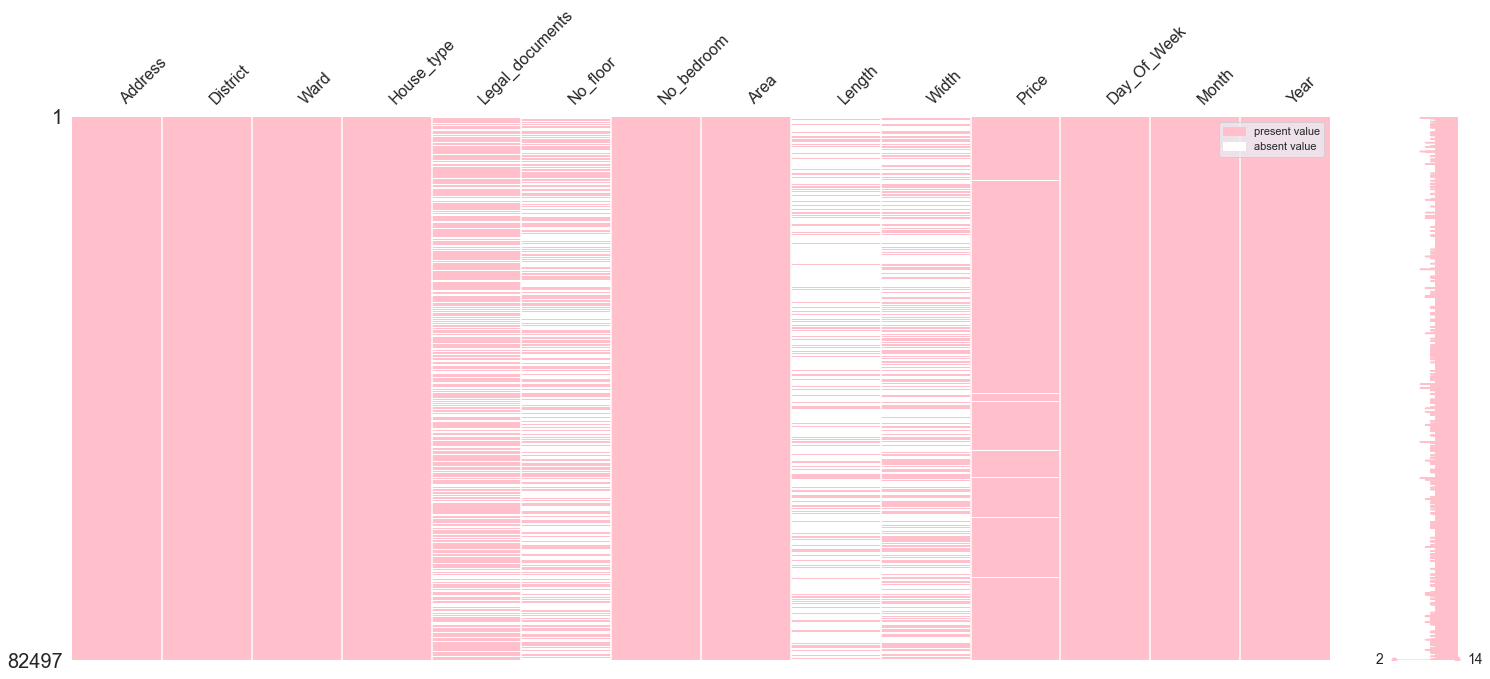

In [15]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100, 2)[
        round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100, 2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# display missing values in descending
print("Missing values in the dataframe in descending: \n", missing_percentage(df).sort_values(by='Total', ascending=False))

# visualize where the missing values are located
msno.matrix(df, color=(255 / 255, 192 / 255, 203 / 255))
pink_patch = mpatches.Patch(color='pink', label='present value')
white_patch = mpatches.Patch(color='white', label='absent value')
plt.legend(handles=[pink_patch, white_patch])
plt.show()

### ------> OBSERVATION

<hr>

+ Only a few missing values of the dataframes suggests that it MIGHT be missing completely at random due to a small number of missing values.

District             2      NaN
Area                 2      NaN
Date                 1      NaN
day_of_week          1      NaN


#### I'm going to delete any missing column that IS COMPLETELY AT RANDOM (MCAR) AND has small number of missing values.
#### From the graph, I can see a strong correlation the strong correlation between `Legal_documents`, `No_floor`, `Length` and `Width`.


<hr>

In [16]:
# Pairwise delete the rows
df.dropna(subset=['District', 'Area', 'Day_Of_Week', 'Month', 'Year'], how='any', inplace=True)

<br><br>
<a id="2.2"></a>
# Task 2.2: Check data types & Make the data homogeneous
The dtypes that pandas uses are: `float`, `int`, `bool`, `datetime`, `timedelta`, `category` and `object`. I modify data types in my DataFrames to help me transform them into more meaningful metrics

+ Cast pandas objects to a specified dtype (string)¶
+ Numeric data should have for example the same number of digits after the point.

In [17]:
print("The shape of the data BEFORE CONVERT is (row, column):", str(df.shape))
print("The data types BEFORE CONVERT are:", df.dtypes, "\n\n")

# convert columns to the best possible dtypes, object->string
df = df.convert_dtypes()
df[['Month', 'Year']] = df[['Month', 'Year']].astype('int32', errors='ignore')


print("The shape of the data AFTER CONVERT is (row, column):", str(df.shape))
print("The data types AFTER CONVERT are:", df.dtypes, "\n\n")

The shape of the data BEFORE CONVERT is (row, column): (82494, 14)
The data types BEFORE CONVERT are: Address             object
District            object
Ward                object
House_type          object
Legal_documents     object
No_floor            object
No_bedroom          object
Area               float64
Length             float64
Width              float64
Price              float64
Day_Of_Week         object
Month               object
Year                object
dtype: object 


The shape of the data AFTER CONVERT is (row, column): (82494, 14)
The data types AFTER CONVERT are: Address             string
District            string
Ward                string
House_type          string
Legal_documents     string
No_floor            string
No_bedroom          string
Area               Float64
Length             Float64
Width              Float64
Price              Float64
Day_Of_Week         string
Month                int32
Year                 int32
dtype: object 




In [18]:
print("The dataframe BEFORE dropped has {} rows and {} columns".format(df.shape[0], df.shape[1]))

# If all values are NA, drop that row or column.
df.dropna(how='all', inplace=True)

# display missing values in descending
print("The dataframe AFTER dropped has {} rows and {} columns".format(df.shape[0], df.shape[1]))
print("Missing values in the dataframe in descending: \n", missing_percentage(df).sort_values(by='Total', ascending=False))

The dataframe BEFORE dropped has 82494 rows and 14 columns
The dataframe AFTER dropped has 82494 rows and 14 columns
Missing values in the dataframe in descending: 
                  Total  Percent
Length           62668    75.97
Width            47051    57.04
No_floor         46096    55.88
Legal_documents  28886    35.02
Price              869     1.05
Address             47     0.06
Ward                46     0.06
No_bedroom          38     0.05
House_type          31     0.04


In [19]:
# extract the value date to get the day of week
df['Day_Of_Week'].value_counts(dropna=False)

TUESDAY      14310
MONDAY       13888
WEDNESDAY    12459
THURSDAY     12425
FRIDAY       12170
SATURDAY     10669
SUNDAY        6573
Name: Day_Of_Week, dtype: Int64

In [20]:
# check the unique value of the month
df['Month'].value_counts(dropna=False)

7     44807
6     29791
8      7542
5       196
4        59
3        51
2        36
10        6
12        3
11        2
9         1
Name: Month, dtype: int64

In [21]:
# check the unique value of the year
df['Year'].value_counts(dropna=False)

2020    82476
2019       18
Name: Year, dtype: int64

In [22]:
# check the unique value of legal_documents to to see if the value is completely translated
df['Legal_documents'].value_counts(dropna=False)

AVAILABLE    52912
NaN          28886
WAITING        356
OTHERS         340
Name: Legal_documents, dtype: Int64

As you can see, the Legal_documents contains a great amount of missing value. Instead of filling the missing value with mode which is AVAILABLE, it will be better to fill it with OTHERS. It is safe to assume if a house's legal documents is not listed, we can said that the house is OTHERS which is not AVAILABLE OR WAITING.

In [23]:
# fill the missing value for Legal_documents by 'OTHERS'
df['Legal_documents'].fillna("OTHERS", inplace=True)

In [24]:
# check the unique value of the House_type
df['House_type'].value_counts(dropna=False)

BYROAD          62535
STREET_HOUSE    17095
TOWNHOUSE        1881
VILLA             952
NaN                31
Name: House_type, dtype: Int64

As you can see, the missing value is too small. Hence, we will fill it with the mode

In [25]:
# fill the missing value with mode
mode = df['House_type'].mode()[0]
df['House_type'].fillna(mode, inplace=True)

In [26]:
# check if there is any missing value in district
df[['Address', 'Ward', 'District']][df['District'].isna()]

,Address,Ward,District


In [27]:
# check if there is any missing value in ward
df[['Address', 'Ward', 'District']][df['Ward'].isna()]

,Address,Ward,District
174,<NA>,<NA>,NAM TỪ LIÊM
324,"ĐƯỜNG AN DƯƠNG VƯƠNG, QUẬN TÂY HỒ, HÀ NỘI",<NA>,TÂY HỒ
741,"CẦU KHÊ TANG, QUẬN HÀ ĐÔNG, HÀ NỘI",<NA>,HÀ ĐÔNG
4558,<NA>,<NA>,HUYỆN HOÀI ĐỨC
5282,<NA>,<NA>,LONG BIÊN
5295,<NA>,<NA>,LONG BIÊN
7169,<NA>,<NA>,HUYỆN THANH TRÌ
8584,<NA>,<NA>,THANH XUÂN
12595,<NA>,<NA>,HÀ ĐÔNG
14548,<NA>,<NA>,HÀ ĐÔNG


### ------> OBSERVATION

<hr>

> When appraising a property, specific factors like location are only crucial if that factor is significant enough (NOT too many categories). As you can see, the address point to many location fields like city, ward, and street. Hence, there is no particular ward because a street can have multiple wards. Thus, we should only fill the missing value with None. This will conclude that there is a small percentage of housing without a specific location. Thus, the price of these houses will strongly influence the district compared to the street and the ward location. Additionally, these data will not be as crucial as a house with a specific address because an abstract house or not detailed house might not be realistic for the model to learn.

<hr>

In [28]:
# fill the missing value with None for Ward and Address column
df['Ward'].fillna("None", inplace=True)
df['Address'].fillna("None", inplace=True)

# check the unique value of the No_floor
df['No_floor'].value_counts(dropna=False)

NaN                46096
5                  15769
4                  12278
3                   3619
6                   2119
2                   1028
1                    636
7                    597
8                    188
9                     88
10                    36
45                     8
GREATER_THAN_10        7
35                     6
12                     2
50                     2
38                     2
40                     1
54                     1
32                     1
65                     1
14                     1
73                     1
29                     1
55                     1
33                     1
30                     1
42                     1
52                     1
25                     1
Name: No_floor, dtype: Int64

As you can see the missing value is large. However, we can do an assumption that we can fill it with the mode because there is no better option like fill with mean or median. This is explainable because most of the house in Vietnam are having around 5 floors which is shown in the above result. Hence, we can assume the remaining missing value will also have around 5 floors.

In [29]:
# fill the missing value with mode
mode = df['No_floor'].mode()[0]
df['No_floor'].fillna(mode, inplace=True)

In [30]:
# define a function to feed into the lambda
def No_floor_count(value):
    if value == '1' or value == '2' or value == '3' \
            or value == '4' or value == '5' or value == '6' \
            or value == '7' or value == '8' or value == '9' or value == '10':
        return value
    else:
        return 'GREATER_THAN_10'

# make any floor greater than 10 to be in category 'GREATER_THAN_10'
df['No_floor'] = df['No_floor'].map(lambda n: No_floor_count(n))
# check if the above operation is success or not
df['No_floor'].value_counts(dropna=False)

5                  61865
4                  12278
3                   3619
6                   2119
2                   1028
1                    636
7                    597
8                    188
9                     88
GREATER_THAN_10       40
10                    36
Name: No_floor, dtype: int64

In [31]:
# check the No_bedroom
df['No_bedroom'].value_counts(dropna=False)

4                  29069
3                  27162
5                   7924
2                   7330
6                   6461
1                   1388
8                    938
GREATER_THAN_10      869
7                    678
10                   354
9                    283
NaN                   38
Name: No_bedroom, dtype: Int64

Since the missing value is small and neglectable. Hence, we will fill the missing value with mode. This is explainable because of the house in Vietnam is having 4 bedrooms which is shown in the above result. Hence, we can assume that the remaining missing value will also have around 4 bedrooms.

In [32]:
# fill the missing value with mode
mode = df['No_bedroom'].mode()[0]
df['No_bedroom'].fillna(mode, inplace=True)

In [33]:
# Different Location have different housing area

# fill the missing value of area base on the median of area in district
df['Area'] = df.groupby('District')['Area'].apply(lambda x: x.fillna(x.median()))
# fill the missing value of price base on the median of price in district
df['Price'] = df.groupby('District')['Price'].apply(lambda x: x.fillna(x.median()))

# fill the missing value of length base on the median of length of area
df['Length'] = df.groupby('Area')['Length'].apply(lambda x: x.fillna(x.median()))
# fill the remaining missing value base on the mean of the entire column
df['Length'].fillna(df['Length'].mean(), inplace=True)
# fill the missing value of width base on the median of width of area
df['Width'] = df.groupby('Area')['Width'].apply(lambda x: x.fillna(x.median()))
# fill the remaining missing value base on the mean of the entire column
df['Width'].fillna(df['Width'].mean(), inplace=True)

### Let's first identify features with single or unique value in Adress field like `HÀ NỘI`, `PHƯỜNG`, `HUYỆN`, and `QUẬN` since they will be less significant and we can drop them.

In [34]:
# we will clean the address and only get the street number and street section, the remaining is already present in the ward, and district column
# we also assume these house are all in Hanoi

# get the remaing of the string (street number and street name) and put into new column call street
df['Street'] = df['Address'].str.replace('(, QUẬN|, PHƯỜNG|, HUYỆN|, HÀ NỘI).*', '', regex=True)
# remove all the prefix in the street
df['Street'] = df['Street'].str.replace('ĐƯỜNG\s', '', regex=True)
# remove all the prefix in the street
df['Street'] = df['Street'].str.replace('PHỐ\s', '', regex=True)

# print out list of Street types
print(f'NUMBER OF CATEGORIES: {df.Street.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.Street.unique()}\n\n\n')

NUMBER OF CATEGORIES: 7378; 

UNIQUE NAMES OF THE CATEGORIES <StringArray>
[                           'HOÀNG QUỐC VIỆT',
                                  'KIM GIANG',
                                  'MINH KHAI',
                                   'VÕNG THỊ',
                                    'YÊN HÒA',
                                    'TÂY SƠN',
                                     'LÒ ĐÚC',
                                    'XUÂN LA',
                                       '19/5',
                'TỰU LIỆT, THỊ TRẤN VĂN ĐIỂN',
 ...
                              '02, XUÂN ĐỈNH',
                             '42, HOÀNG NGÂN',
                            'TỔ 23, HOA BẰNG',
 'SỐ 9 NGÕ 211/229, KHƯƠNG TRUNG, THANH XUÂN',
                        '25, 25 VŨ NGỌC PHAN',
                  '101B-C4, NGÕ 231, TÂN MAI',
                  'KHU B ĐẠI HỌC MỎ ĐỊA CHẤT',
                      'LÊ TRỌNG TẤN HOÀI ĐỨC',
                       'LẠC LONG QUÂN TÂY HỒ',
         'SỐ 7 ĐẠI LỘ THĂNG

In [35]:
# since the column street, ward, and district already present the column address we delete the column address
df.drop('Address', 1, inplace=True)

In [36]:
# check if there is any remaining missing value
df.isna().sum()

District           0
Ward               0
House_type         0
Legal_documents    0
No_floor           0
No_bedroom         0
Area               0
Length             0
Width              0
Price              0
Day_Of_Week        0
Month              0
Year               0
Street             0
dtype: int64

In [37]:
# see the unique value of column year
df['Year'].value_counts()

2020    82476
2019       18
Name: Year, dtype: int64

### ------> OBSERVATION

<hr>

> As you can see, the data for 2019 is only 10 rows. Thus, to narrow down our problem, we will only use the database from 2020 to analyse and predict the house price base. Additionally, we know that all the data is collect in 2020. Thus, we will also drop the column year.

<hr>

In [38]:
# drop all the row with value of 2019
df.drop(df.loc[df['Year']==2019].index, inplace=True)
# check if the above operation is successful or not
df['Year'].value_counts()

2020    82476
Name: Year, dtype: int64

In [39]:
# drop the column year because it is not meaningful anymore
df.drop('Year', 1, inplace=True)
# check the missing value
df.isna().sum()

District           0
Ward               0
House_type         0
Legal_documents    0
No_floor           0
No_bedroom         0
Area               0
Length             0
Width              0
Price              0
Day_Of_Week        0
Month              0
Street             0
dtype: int64

## Extra-whitespaces

In [40]:
def whitespace_remover(df):
    """
    The function will remove extra leading and trailing whitespace from the data.
    """
    # iterating over the columns
    for i in df.columns:
        # checking datatype of each columns
        if df[i].dtype == 'object' or df[i].dtype == 'str':
            # applying strip function on column
            df[i] = df[i].map(str.strip)
        else:
            # if condition is False then it will do nothing.
            pass

# remove all the extra whitespace
whitespace_remover(df)

### ----------> OBSERVATION
<hr>

> There is no typo left

<hr>

<br><br>
<a id="2.6"></a>
# 2.6 Sanity checks
Design and run a small test-suite, consisting of a series of sanity checks to test for the presence of **impossible values** and **outliers** for each attribute.
<a id="2.6.1"></a>
### 2.6.1 Check duplication
+ Use the pandas function `.drop_duplicates()` to remove copied rows from a DataFrame

+ Could not drop duplicated in TEST since I'll use it to compete in Kaggle learboard

In [41]:
# print all the info
print("Number of rows before drop of duplicates  in df:", len(df.index))
print("Number of duplicated records in df: ", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Number of rows after drop of duplicates in df:", len(df.index), "\n\n")

# convert columns to the best possible dtypes, object->string
df = df.convert_dtypes()
df.info()

Number of rows before drop of duplicates  in df: 82476
Number of duplicated records in df:  1361
Number of rows after drop of duplicates in df: 81115 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 81115 entries, 0 to 82477
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   District         81115 non-null  string 
 1   Ward             81115 non-null  string 
 2   House_type       81115 non-null  string 
 3   Legal_documents  81115 non-null  string 
 4   No_floor         81115 non-null  string 
 5   No_bedroom       81115 non-null  string 
 6   Area             81115 non-null  Float64
 7   Length           81115 non-null  Float64
 8   Width            81115 non-null  Float64
 9   Price            81115 non-null  Float64
 10  Day_Of_Week      81115 non-null  string 
 11  Month            81115 non-null  Int32  
 12  Street           81115 non-null  string 
dtypes: Float64(4), Int32(1), string(8)
memory u

In [42]:
# check all the column name
df.columns

Index(['District', 'Ward', 'House_type', 'Legal_documents', 'No_floor',
       'No_bedroom', 'Area', 'Length', 'Width', 'Price', 'Day_Of_Week',
       'Month', 'Street'],
      dtype='object')

<a id="2"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>2. Checking for impossiple values</strong></h1>

# Descriptive statistics for Central Tendency Using Pandas

In [43]:
# see the static of all numerical column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,81115.0,51.544650,474.656056,1.0,34.00,40.0,50.00,111411.0
Length,81115.0,29.949469,3198.381909,1.0,9.00,10.0,12.00,900000.0
Width,81115.0,18.905477,2050.216069,1.0,4.00,4.0,4.30,423432.0
Price,81115.0,102.455002,63.263470,1.0,73.33,90.0,110.29,998.0
Month,81115.0,6.720360,0.640843,2.0,6.00,7.0,7.00,8.0


<AxesSubplot:>

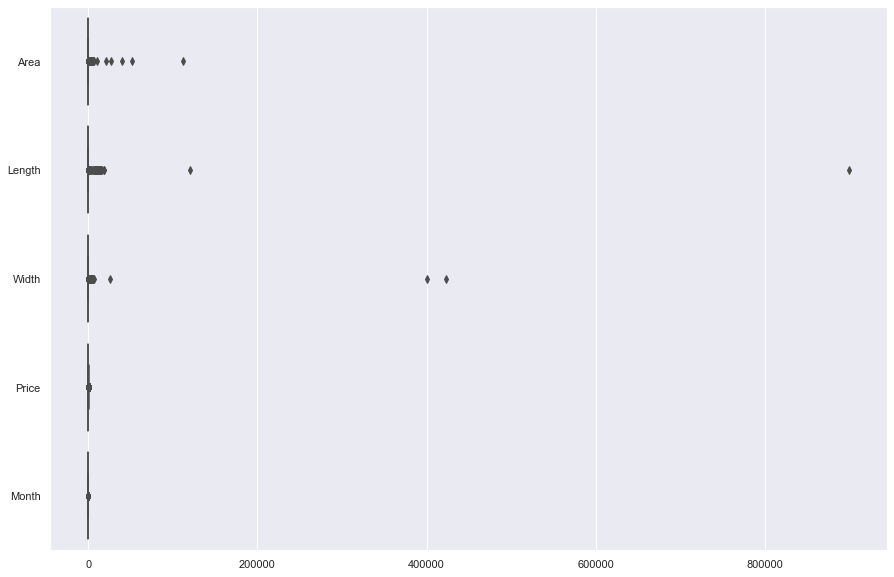

In [44]:
# plot the boxplot to see the outlier of each numerical column
plt.figure(figsize= (15,10))
sns.boxplot(data=df,orient="h")

### ---------> OBSERVATION
> For all numerical columns, I see some extreme outlier values in `Area`, `Length`, and `Width`. Let's investigate them further to see if they are real outliers or not using statistical techniques.

### Interquartile Range

In [45]:
# calculate the q1 and q3 and then the iqr
q1_Price = df['Price'].quantile(.25)
q3_Price = df['Price'].quantile(.75)
iqr_Price = q3_Price - q1_Price

print("q1_Price:", q1_Price, "\n")
print("q3_Price:", q3_Price, "\n")
print("iqr_Price:", iqr_Price)

q1_Price: 73.33 

q3_Price: 110.29 

iqr_Price: 36.96000000000001


(0.0, 400.0)

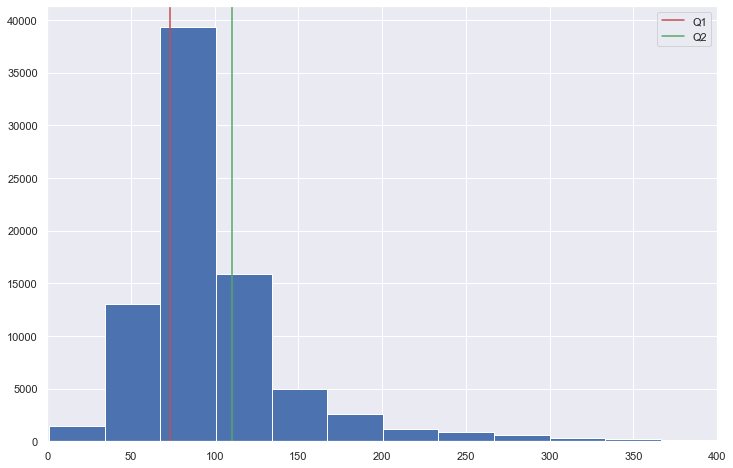

In [46]:
# plot the histogram with the value of q1 and q3
plt.figure(figsize=(12, 8))

df['Price'].hist(bins=30)

plt.axvline(q1_Price, color='r', label='Q1')
plt.axvline(q3_Price, color='g', label='Q2')

plt.legend()

# plt.ylim(0,50000)
plt.xlim(0,400)

# Descriptive statistics for Variability Using Pandas

In [47]:
# look at the price mean
Price_mean = df['Price'].mean()
# look at the price median
Price_median = df['Price'].median()
# look at the price mode
Price_mode = df['Price'].mode().values[0]

(0.0, 550.0)

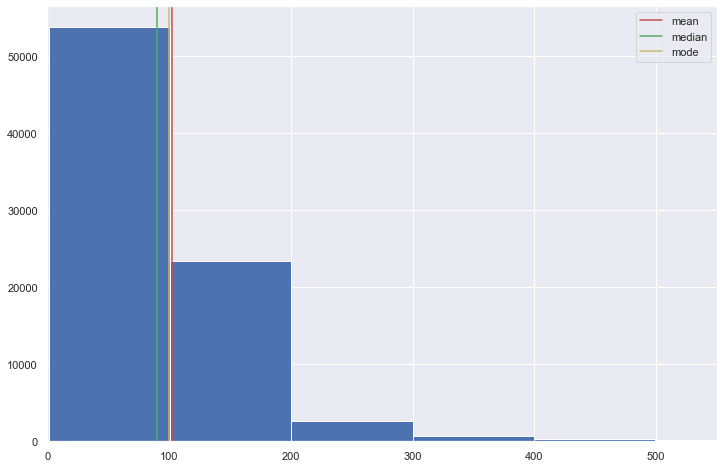

In [48]:
# plot the histogram with mean, median, and mode included
plt.figure(figsize=(12, 8))

df['Price'].hist()

plt.axvline(Price_mean, color='r', label='mean')
plt.axvline(Price_median, color='g', label='median')
plt.axvline(Price_mode, color='y', label='mode')

plt.legend()

# plt.ylim(0,50000)
plt.xlim(0,550)

### ---------> OBSERVATION
> The mean larger than the median indicates that the data is skewed to the right.

In [49]:
# get all the house type and the frequency of each cooresponding type
House_type_counts = {}
# do a forloop to collect the frequency of each house type
for p in df['House_type']:
    if p not in House_type_counts:
        House_type_counts[p] = 1
    else:
        House_type_counts[p] += 1
# print the result
House_type_counts

{'BYROAD': 61310, 'STREET_HOUSE': 16983, 'VILLA': 952, 'TOWNHOUSE': 1870}

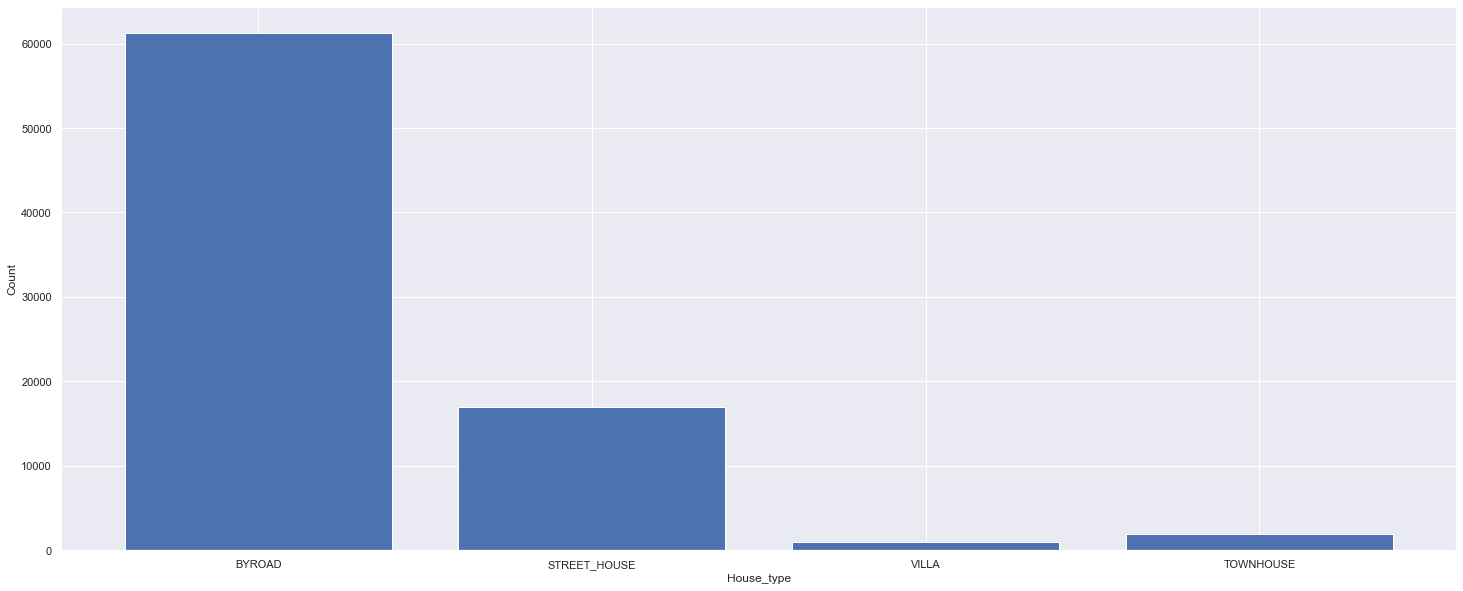

In [50]:
# plot the bar chart
plt.figure(figsize=(25, 10))

x_range = range(len(House_type_counts))

plt.bar(x_range, list(House_type_counts.values()), align='center')
plt.xticks(x_range, list(House_type_counts.keys()))

plt.xlabel('House_type')
plt.ylabel('Count')

plt.show()

### ---------> OBSERVATION
> BYROAD has the highest count of houses

In [51]:
# Rules and policies for building houses in Hanoi is taken from Havaco VN website.

# houses in cities have area of 40 m2 will only have at most 5 floors. Therefore, we have to code filter the dataframe
# to exclude those who are not satisfy the condition.

# About townhouse policy:

#Townhouse can't be build more than 6 floors. Townhouse in alley smaller than 6m can't be more than 4 floors.
#Land for building with area from 30m2 to 40m2, house can be build no more than 4 floors and 1 attic.
#Land for building with area more than 50m2, houser can be build at most 6 floors.

#About street_house policy:

#Land for building with area from 15m2 to less than 30m2, house can be build at most 4 floors and 1 attic.
#Land for building with area from 30m2 to less than 40m2 , hosue can be build at most 4 floors and 1 attic.
#Land for building with area more than 50m2, house can be build at most 6 floors.

#Citation:
#Công ty TNHH Nội thất Havaco Việt Nam. 2021. Quy định chiều cao xây dựng nhà ở Hà Nội. [online] Available at: <https://havacovn.com/goc-tu-van/quy-dinh-chieu-cao-xay-dung-nha-o-ha-noi> [Accessed 26 December 2021].

### Create categorical price
we will group the price range together. This column will be our target column to predict the house price range base on others attribute such as location, house's property.

In [52]:
# check for all the static of the price column
df['Price'].describe()

count    81115.000000
mean       102.455002
std         63.263470
min          1.000000
25%         73.330000
50%         90.000000
75%        110.290000
max        998.000000
Name: Price, dtype: float64

<AxesSubplot:>

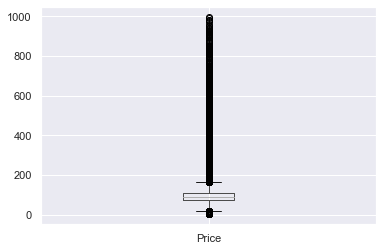

In [53]:
# plot out the price column to see outlier
df.boxplot('Price')

### Create categorical price by deriving New Features
We will adjust the range so that the frequency percentage of each price will be close to each other. This will be a method to make this class balance instead of just make the price range consecutive equal distributive different.

In [54]:
# add the new column call Price_rance and input the value cooresponding to the price
df.loc[df['Price'].between(1, 61, inclusive=True), 'Price_range'] = '1-60'
df.loc[df['Price'].between(61, 71, inclusive=True), 'Price_range'] = '61-70'
df.loc[df['Price'].between(71, 81, inclusive=True), 'Price_range'] = '71-80'
df.loc[df['Price'].between(81, 91, inclusive=True), 'Price_range'] = '81-90'
df.loc[df['Price'].between(91, 101, inclusive=True), 'Price_range'] = '91-100'
df.loc[df['Price'].between(101, 201, inclusive=True), 'Price_range'] = '101-200'
df.loc[df['Price'].between(201, 301, inclusive=True), 'Price_range'] = '201-300'
df.loc[df['Price'].between(301, 1001, inclusive=True), 'Price_range'] = '301-1000'

<a id="2"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>3. Data exploration (EDA)</strong></h1>


## Analysis

**We will analyse the following:**

1. The target variable
2. Variable types (categorical and numerical)
3. Missing data
4. Numerical variables
    - Discrete
    - Continuous
    - Distributions
    - Transformations

5. Categorical variables
    - Cardinality
    - Rare Labels
    - Special mappings

6. Additional Reading Resources

### Bivariate Analysis

<AxesSubplot:xlabel='Length', ylabel='Price'>

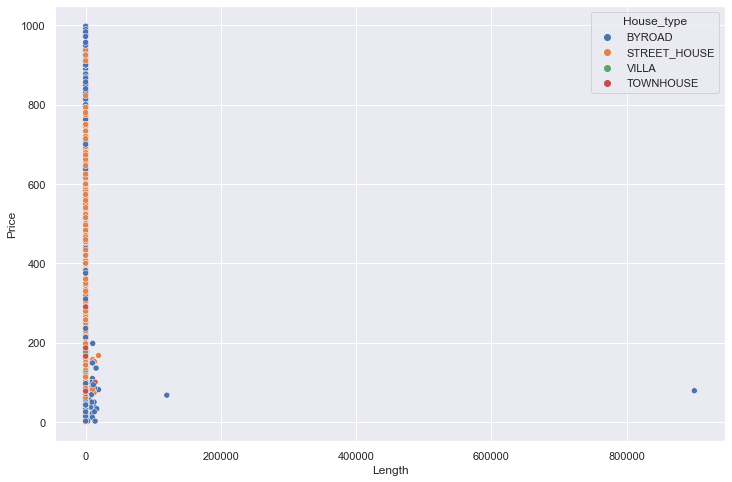

In [55]:
plt.figure(figsize=(12, 8))

sns.scatterplot(x = "Length", y = "Price", hue='House_type', data=df)

### ---------> OBSERVATION
> There is 1 extreme outlier in the dataset for the `Length` attribute that > 8000000 meter.

### Multivariate data analysis

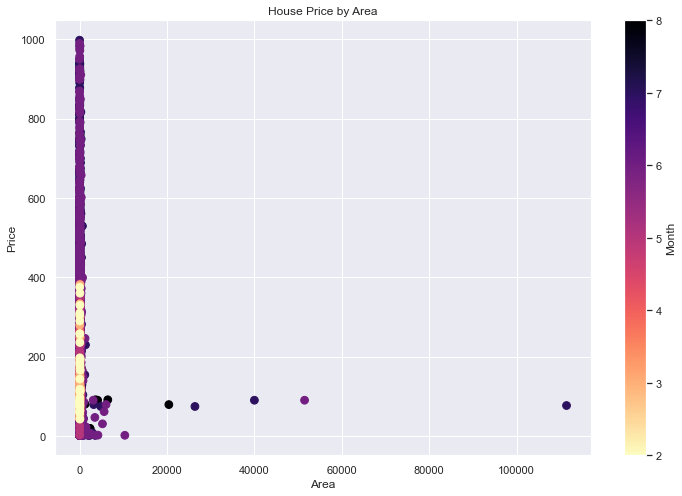

In [56]:
fig, ax = plt.subplots()

df.plot(x='Area', y='Price',
                     kind='scatter', s=60, c='Month',
                     cmap='magma_r', title='House Price by Area',
                     figsize=(12, 8), ax=ax)

plt.show()

### ---------> OBSERVATION
> There are outliers from the range of 20000 to 20000 meter square for the Area column

# Date visualization

### Number of houses for Day Of Week by Types

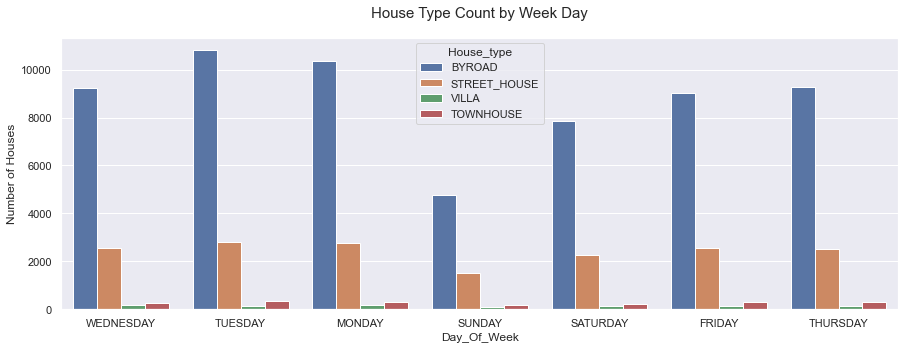

In [57]:
# define the figure size
plt.figure(figsize=(15, 5))

# create count plot for severity for each year
sns.countplot(x='Day_Of_Week', hue='House_type', data=df)

# set the ticks, labels and title
plt.title('House Type Count by Week Day', size=15, y=1.05)
plt.ylabel("Number of Houses")

# show plot
plt.show()

### ---------> OBSERVATION
> The most houses were recorded on Tuesday, and the BYROAD house is the most popular house type.

### Number of houses for Month by Types

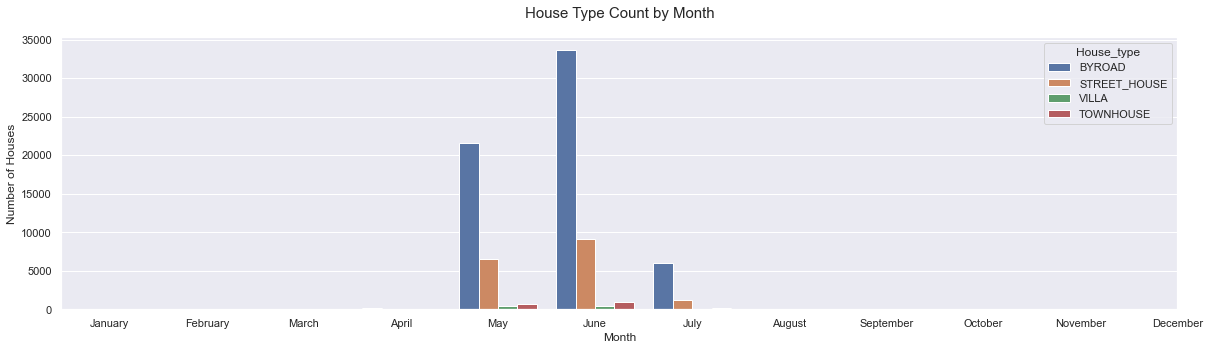

In [58]:
# import calendar for getting the month and week names
import calendar

# define the plot size
plt.figure(figsize=(20, 5))

# create count plot for severity for each month
sns.countplot(x='Month', hue='House_type', data=df)

# set itle, labels and ticks
plt.title('House Type Count by Month', size=15, y=1.05)
plt.ylabel("Number of Houses")
plt.xticks(np.arange(0, 12, 1), calendar.month_name[1:13])

#show plot
plt.show()

### ---------> OBSERVATION
> Surprisingly, significantly higher houses were recorded from May to July, and the BYROAD house is the most popular house type.

# FacetGrid
* We first initialise a FacetGrid object with a dataframe
* Specify the row, column and hue parameters
* Every unique value of the categorical variable is then used to create a facet along the specified axis.
* A plotting function is applied to each subset by using a map function


(0.0, 10000.0)

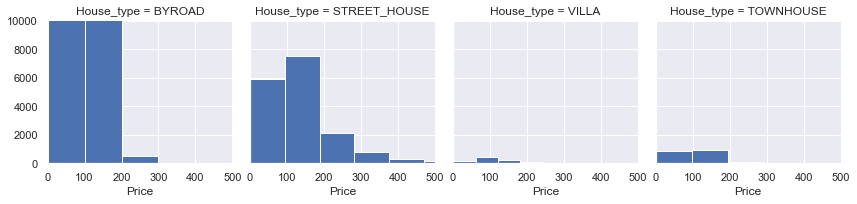

In [59]:
g=sns.FacetGrid(df,col="House_type")
g.map(plt.hist,"Price")

plt.xlim(0,500)
plt.ylim(0,10000)

### ---------> OBSERVATION

> We have called the plt.hist function to plot a histogram for the count and total price for the different types of house types in Hanoi.

> It is clear that the STREET house type has the highest price. It has the maximum interaction in the form of all types. The histogram shows that the price between 0 and 300 has the largest area, implying highest price.

> All houses have more likely to have prices in the range of 50 to 300.

> The houses with a STREET house type are more popular than those with VILLA, BYROAD, or TOWNHOUSE types.

#### We now pass multiple variables to make a relational Scatterplot.

#### Adding a legend to show what the colors stand for
We have added "alpha=0.7" to reduce the opacity of the points in the scatterplot.
It is 1 by default. Making it closer to 0 makes it more transparent.

(0.0, 5000.0)

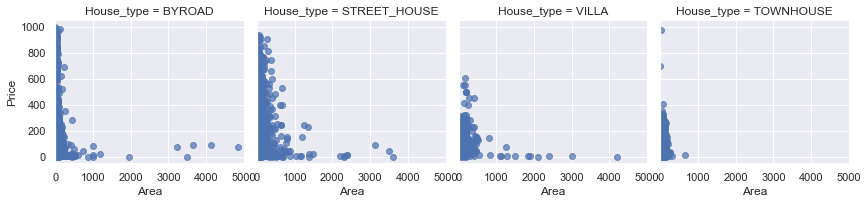

In [60]:
g=sns.FacetGrid(df, col="House_type")
g.map(plt.scatter,"Area", "Price", alpha=0.7)

g.add_legend()

plt.xlim(0,5000)
# plt.ylim(0,10000)

### ---------> OBSERVATION
> In the range of 0 to 5000 meter square, the STREET house type has the highest price and the BYROAD has larger area than others

In [61]:
# #Creating a dictionary for markers and passing it to hue_kws variable
# h={0:"pink",1:"blue"}
# i={"marker":["^","v"]}

# g=sns.FacetGrid(df,row="Year",
#                 col="House_type",
#                 # hue="Area",
#                 margin_titles=True,
#                 palette=h,
#                 hue_kws=i)

# g.map(sns.regplot,"Area","Price",fit_reg=False)

# g.add_legend()
# plt.xlim(0,1000)

### ---------> OBSERVATION
> In the range of 0 to 1000 meter square, the STREET and BYROAD house types have the highest price and the larger area than others in 2020
> In 2019, a significant portion of the houses were recorded in the range of 0 to 400 meter square.

> We see that the points are plotted with the specified markers. As we have also specified colours, we see that the markers are in accordance with the passed in color scheme



# Bar plot,

*We simply pass in an ordered list to the corresponding parameter, for eg, row_order, hue_order, etc.* <br>
By default, the variables are ordered in ascending order if they are numbers, and in the order of appearance otherwise.

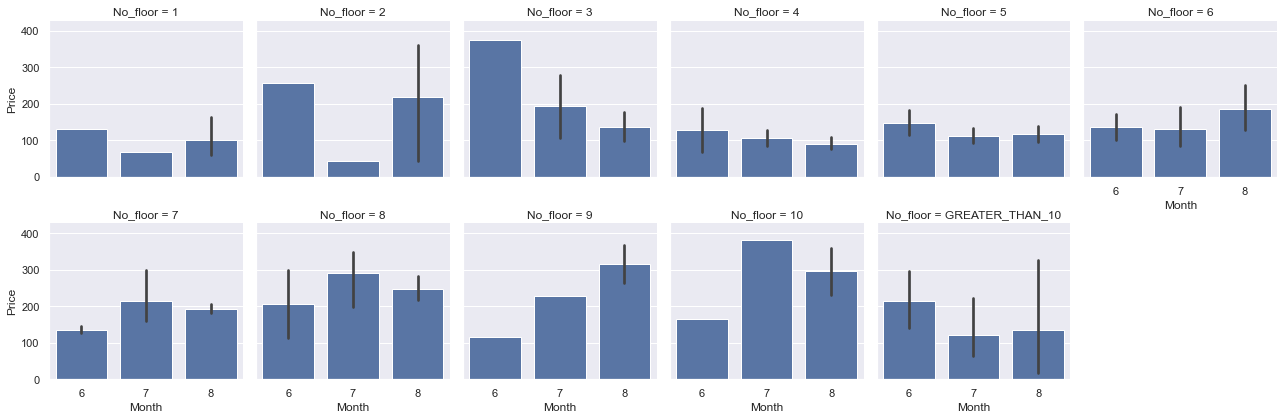

In [62]:
g=sns.FacetGrid(df,col="No_floor", col_order=["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "GREATER_THAN_10"], col_wrap=6)

g.map(sns.barplot,"Month","Price")

### ---------> OBSERVATION
> Hoan Kiem district has the highest house price in the year 2020.

In [63]:
# The most common Ward

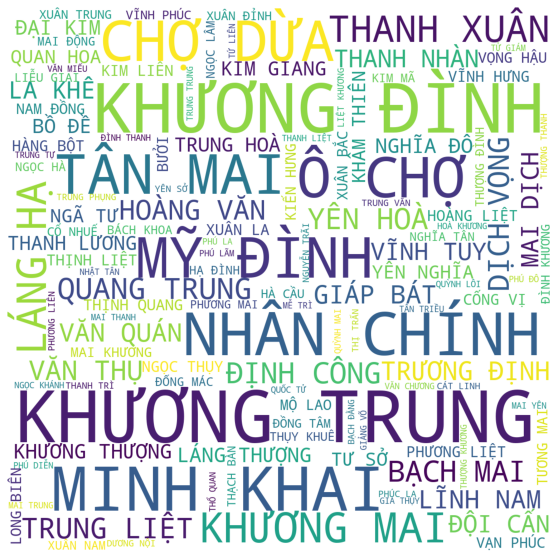

In [64]:
from wordcloud import WordCloud

"""
Word Cloud¶:
get the most common words in the address field to later simplify them.
"""

text = str(list(df['Ward'])).replace(',', '').replace(';', '').replace("'", '').replace(']', '')

plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 122).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### ---------> OBSERVATION
> Khuong Truong and Khuong Dinh are the most common wards in the dataset.

In [65]:
df.columns

Index(['District', 'Ward', 'House_type', 'Legal_documents', 'No_floor',
       'No_bedroom', 'Area', 'Length', 'Width', 'Price', 'Day_Of_Week',
       'Month', 'Street', 'Price_range'],
      dtype='object')

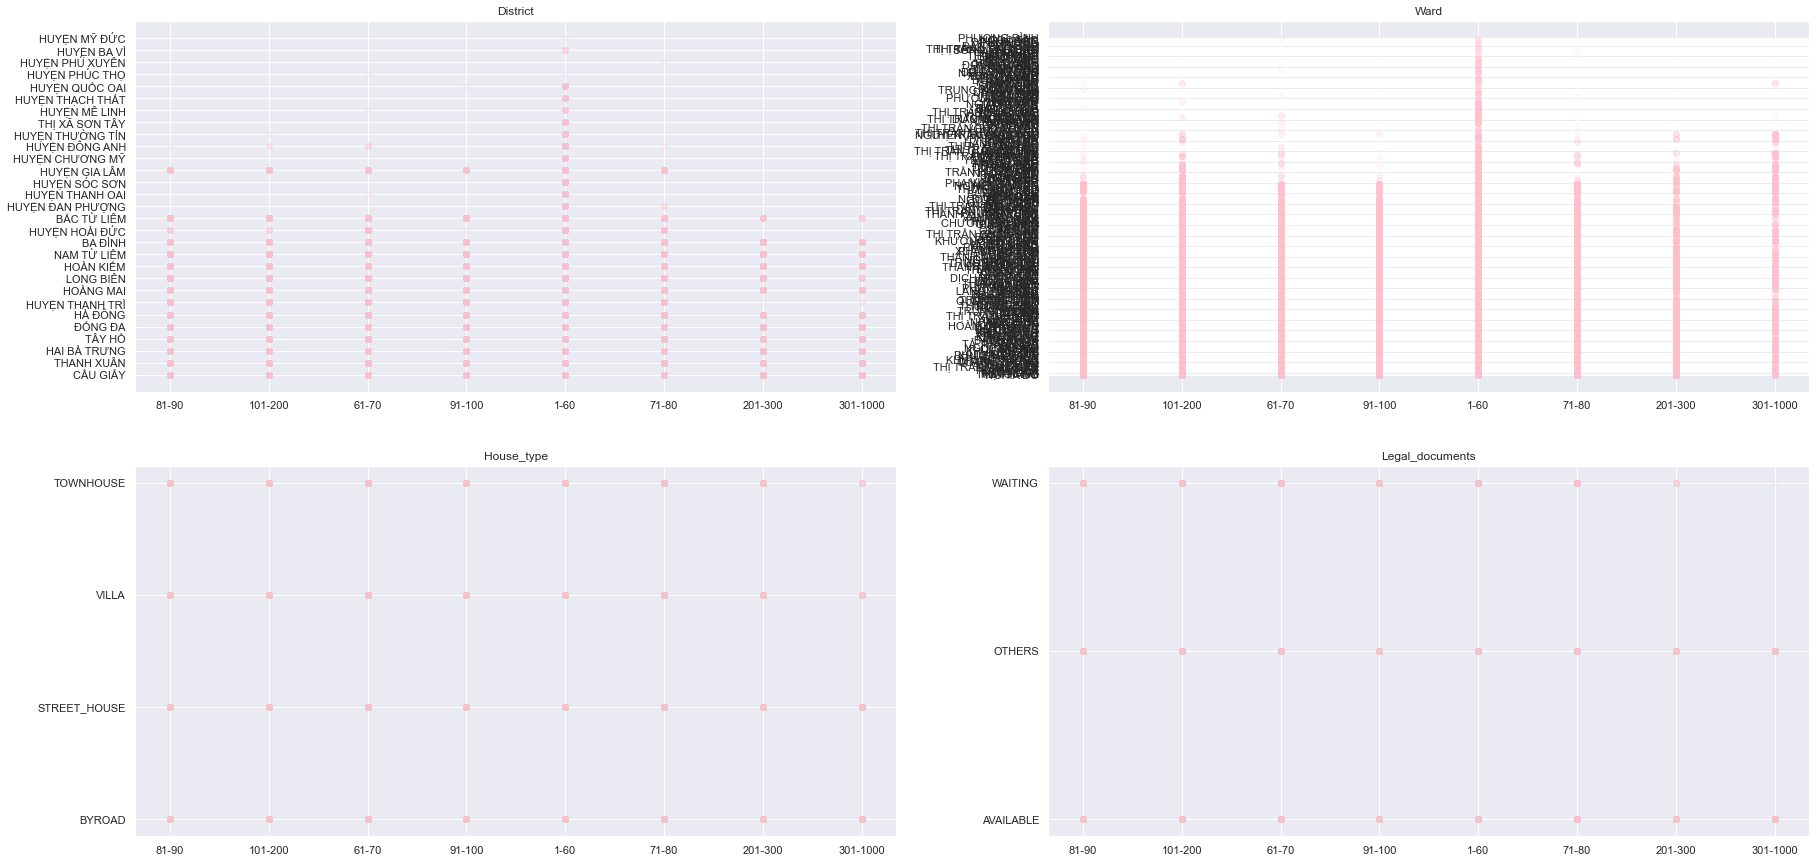

In [66]:
# Creating a large figure
fig = plt.figure(figsize=(30, 15))

# Iterating over the different
for i in range(0, 4):
    # Figure number starts at 1
    ax = fig.add_subplot(2, 2, i+1)
    # Add a title to make it clear what each subplot shows
    plt.title(df.columns[i])
    # Use alpha to better see crossing pints
    ax.scatter(df['Price_range'], df.iloc[:,i], c='pink', alpha=0.1)
    # Only show the tick marks for each target
    plt.xticks(df.Price_range.unique())

<a id="4"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>4. Feature Engineering</strong></h1>

In [67]:
correlation_matrix = df.corr()
AbsoluteCorrelationMatrix = correlation_matrix.abs()
AbsoluteCorrelationMatrix = AbsoluteCorrelationMatrix.where(np.triu(np.ones(AbsoluteCorrelationMatrix.shape), k=1).astype(np.bool))
highCorrelatedIndices = np.where(AbsoluteCorrelationMatrix > 0.8)
correlated_pairs = [(AbsoluteCorrelationMatrix.index[x], AbsoluteCorrelationMatrix.columns[y])
                    for x,y in zip(*highCorrelatedIndices) if x!=y and x < y]

print("Total Number of correlated pairs: ", len(correlated_pairs))
print(correlated_pairs)

print("\n\nThe shape of the data BEFORE DROP is (row, column):", str(df.shape))

corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

df.drop(columns=to_drop, axis=1,inplace=True)
print("The shape of the data AFTER DROP is (row, column):", str(df.shape))

Total Number of correlated pairs:  0
[]


The shape of the data BEFORE DROP is (row, column): (81115, 14)
The shape of the data AFTER DROP is (row, column): (81115, 14)


### Class Imbalances
+ class separability! When is it appropriate to use rebalancing methods?

In [68]:
df['Price_range'].value_counts()

101-200     23384
81-90       12378
71-80       11955
91-100      11780
1-60         9583
61-70        8149
201-300      2580
301-1000     1306
Name: Price_range, dtype: int64

In [69]:
df['Price_range'].value_counts(normalize=True, dropna=False)

101-200     0.288282
81-90       0.152598
71-80       0.147383
91-100      0.145226
1-60        0.118141
61-70       0.100462
201-300     0.031807
301-1000    0.016101
Name: Price_range, dtype: float64

### Encoding

In [70]:
df.head(3)

,District,Ward,House_type,Legal_documents,No_floor,No_bedroom,Area,Length,Width,Price,Day_Of_Week,Month,Street,Price_range
0,CẦU GIẤY,NGHĨA ĐÔ,BYROAD,AVAILABLE,4,5,46.0,11.0,4.0,86.96,WEDNESDAY,8,HOÀNG QUỐC VIỆT,81-90
1,THANH XUÂN,KIM GIANG,STREET_HOUSE,OTHERS,5,3,37.0,10.0,4.0,116.22,WEDNESDAY,8,KIM GIANG,101-200
2,HAI BÀ TRƯNG,MINH KHAI,BYROAD,AVAILABLE,4,4,40.0,10.0,4.0,65.0,WEDNESDAY,8,MINH KHAI,61-70


In [71]:
# create a function to encoding the categorical value
def to_one_hot_encoder(df, column_name):
    # we will set the drop to be if_binary so that we can delete an encoded column if that column have a binary cateogircal value such as true/false, yes/no
    ohe = OneHotEncoder(sparse=False, handle_unknown='error', drop='if_binary')
    
    # get the column and encoding it into dataframe
    data = ohe.fit_transform(df[[column_name]])
    
    # create the dataframe base on data and the value will be integer
    encode_df = pd.DataFrame(data=data, columns=ohe.get_feature_names([column_name]), dtype=int)
    
    # add the encoding dataframe back to the dataframe
    df.reset_index(inplace=True, drop=True)
    df = pd.concat([df, encode_df], axis=1)
    
    # remove the original column
    df.drop([column_name], inplace=True, axis=1)

    return df

In [72]:
!{sys.executable} -m pip install category_encoders
# pip install --upgrade category_encoders
import category_encoders as ce

# this is binary encode where it will encode categorical variable similar to onehot encoding but store categories as binary bitstrings
# this will save the amount of column compare to use the onehot encoding method which will save column space
def binary_encode(df, column_name):
    binary = ce.BinaryEncoder()
    # get the column and encoding it into dataframe
    data = binary.fit_transform(df[[column_name]])
    
    # add the new column back to the original dataframe
    df = pd.concat([df, data], axis=1)

    # remove the original column
    df.drop([column_name], inplace=True, axis=1)
    return df

In [73]:
# create a function to encoding the value
def to_label_encoder(df, column, category):
    oe = OrdinalEncoder(categories=[category])
    # get the column and encoding it into dataframe
    data = oe.fit_transform(df[[column]])
    # create the dataframe base on data and the value will be integer
    encode_df = pd.DataFrame(data=data, columns=[column], dtype=int)
    # add the encoding dataframe back to the dataframe
    df[column] = encode_df.values

In [74]:
# df[df['Street'] == '&&&']
# df[df['Street'] == '....']
# df[df['Street'] == '+']
# df[df['Street'] == '---']
# df[df['Street'] == '']
# # df[df['Street'] == '(']
df.drop('Street', 1, inplace=True)

In [75]:
# df = to_one_hot_encoder(df, 'Street')
df = to_one_hot_encoder(df, 'District')
df = to_one_hot_encoder(df, 'Ward')
df = to_one_hot_encoder(df, 'House_type')
df = to_one_hot_encoder(df, 'Legal_documents')
# df = to_one_hot_encoder(df, 'isUrban')
# df = to_one_hot_encoder(df, 'isSafe')
df = to_one_hot_encoder(df, 'Day_Of_Week')

In [76]:
df.columns

Index(['No_floor', 'No_bedroom', 'Area', 'Length', 'Width', 'Price', 'Month',
       'Price_range', 'District_BA ĐÌNH', 'District_BẮC TỪ LIÊM',
       ...
       'Legal_documents_AVAILABLE', 'Legal_documents_OTHERS',
       'Legal_documents_WAITING', 'Day_Of_Week_FRIDAY', 'Day_Of_Week_MONDAY',
       'Day_Of_Week_SATURDAY', 'Day_Of_Week_SUNDAY', 'Day_Of_Week_THURSDAY',
       'Day_Of_Week_TUESDAY', 'Day_Of_Week_WEDNESDAY'],
      dtype='object', length=357)

In [77]:
lst_No_bedroom = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'GREATER_THAN_10']

to_label_encoder(df, 'No_bedroom', lst_No_bedroom)
to_label_encoder(df, 'No_floor', lst_No_bedroom)

lst_Price_range = ['1-60', '61-70', '71-80', '81-90', '91-100', '101-200', '201-300', '301-1000']

to_label_encoder(df, 'Price_range', lst_Price_range)

In [78]:
df.head(3)

,No_floor,No_bedroom,Area,Length,Width,Price,Month,Price_range,District_BA ĐÌNH,District_BẮC TỪ LIÊM,District_CẦU GIẤY,District_HAI BÀ TRƯNG,District_HOÀN KIẾM,District_HOÀNG MAI,District_HUYỆN BA VÌ,District_HUYỆN CHƯƠNG MỸ,District_HUYỆN GIA LÂM,District_HUYỆN HOÀI ĐỨC,District_HUYỆN MÊ LINH,District_HUYỆN MỸ ĐỨC,District_HUYỆN PHÚ XUYÊN,District_HUYỆN PHÚC THỌ,District_HUYỆN QUỐC OAI,District_HUYỆN SÓC SƠN,District_HUYỆN THANH OAI,District_HUYỆN THANH TRÌ,District_HUYỆN THƯỜNG TÍN,District_HUYỆN THẠCH THẤT,District_HUYỆN ĐAN PHƯỢNG,District_HUYỆN ĐÔNG ANH,District_HÀ ĐÔNG,District_LONG BIÊN,District_NAM TỪ LIÊM,District_THANH XUÂN,District_THỊ XÃ SƠN TÂY,District_TÂY HỒ,District_ĐỐNG ĐA,Ward_AN KHÁNH,Ward_AN THƯỢNG,Ward_BIÊN GIANG,Ward_BÁCH KHOA,Ward_BÁT TRÀNG,Ward_BÌNH PHÚ,Ward_BÌNH YÊN,Ward_BÍCH HÒA,Ward_BÙI THỊ XUÂN,Ward_BƯỞI,Ward_BẠCH MAI,Ward_BẠCH ĐẰNG,Ward_BẮC HỒNG,Ward_BỒ ĐỀ,Ward_CHƯƠNG DƯƠNG,Ward_CÁT LINH,Ward_CẦU DIỄN,Ward_CẦU DỀN,Ward_CỐNG VỊ,Ward_CỔ BI,Ward_CỔ NHUẾ 1,Ward_CỔ NHUẾ 2,Ward_CỔ ĐÔNG,Ward_CỬA NAM,Ward_CỬA ĐÔNG,Ward_CỰ KHÊ,Ward_CỰ KHỐI,Ward_DI TRẠCH,Ward_DUYÊN HÀ,Ward_DUYÊN THÁI,Ward_DƯƠNG LIỄU,Ward_DƯƠNG NỘI,Ward_DƯƠNG QUANG,Ward_DƯƠNG XÁ,Ward_DỊCH VỌNG,Ward_DỊCH VỌNG HẬU,Ward_DỤC TÚ,Ward_GIA THỤY,Ward_GIANG BIÊN,Ward_GIÁP BÁT,Ward_GIẢNG VÕ,Ward_HOÀNG LIỆT,Ward_HOÀNG VĂN THỤ,Ward_HÀ CẦU,Ward_HÀ HỒI,Ward_HÀNG BUỒM,Ward_HÀNG BÀI,Ward_HÀNG BÔNG,Ward_HÀNG BẠC,Ward_HÀNG BỒ,Ward_HÀNG BỘT,Ward_HÀNG GAI,Ward_HÀNG MÃ,Ward_HÀNG TRỐNG,Ward_HÀNG ĐÀO,Ward_HÒA THẠCH,Ward_HƯƠNG NGẢI,Ward_HẠ ĐÌNH,Ward_HẢI BỐI,Ward_HỢP THANH,Ward_HỮU HOÀ,Ward_KHÁNH HÀ,Ward_KHÂM THIÊN,...,Ward_TRUNG SƠN TRẦM,Ward_TRUNG TỰ,Ward_TRUNG VĂN,Ward_TRÀNG TIỀN,Ward_TRÚC BẠCH,Ward_TRƯƠNG ĐỊNH,Ward_TRẦN HƯNG ĐẠO,Ward_TRẦN PHÚ,Ward_TÂN HỘI,Ward_TÂN LẬP,Ward_TÂN MAI,Ward_TÂN TRIỀU,Ward_TÂN XÃ,Ward_TÂY MỖ,Ward_TÂY TỰU,Ward_TƯƠNG MAI,Ward_TẢ THANH OAI,Ward_TỨ HIỆP,Ward_TỨ LIÊN,Ward_UY NỖ,Ward_VIÊN SƠN,Ward_VIỆT HÙNG,Ward_VIỆT HƯNG,Ward_VÂN CANH,Ward_VÂN CÔN,Ward_VÂN HÒA,Ward_VÂN NỘI,Ward_VÂN TẢO,Ward_VÕNG LA,Ward_VÕNG XUYÊN,Ward_VĂN BÌNH,Ward_VĂN CHƯƠNG,Ward_VĂN MIẾU,Ward_VĂN QUÁN,Ward_VĨNH HƯNG,Ward_VĨNH NGỌC,Ward_VĨNH PHÚC,Ward_VĨNH QUỲNH,Ward_VĨNH TUY,Ward_VẠN PHÚC,Ward_XUÂN GIANG,Ward_XUÂN KHANH,Ward_XUÂN LA,Ward_XUÂN NỘN,Ward_XUÂN PHƯƠNG,Ward_XUÂN TẢO,Ward_XUÂN ĐỈNH,Ward_YÊN HOÀ,Ward_YÊN NGHĨA,Ward_YÊN PHỤ,Ward_YÊN SỞ,Ward_YÊN THƯỜNG,Ward_YÊN VIÊN,Ward_YẾT KIÊU,Ward_Ô CHỢ DỪA,Ward_ĐA TỐN,Ward_ĐAN PHƯỢNG,Ward_ĐIỆN BIÊN,Ward_ĐÌNH XUYÊN,Ward_ĐÔNG DƯ,Ward_ĐÔNG HỘI,Ward_ĐÔNG LA,Ward_ĐÔNG MỸ,Ward_ĐÔNG NGẠC,Ward_ĐÔNG XUÂN,Ward_ĐÔNG YÊN,Ward_ĐẠI KIM,Ward_ĐẠI MẠCH,Ward_ĐẠI MỖ,Ward_ĐẠI THÀNH,Ward_ĐẠI THỊNH,Ward_ĐẠI YÊN,Ward_ĐẠI ÁNG,Ward_ĐẶNG XÁ,Ward_ĐỊNH CÔNG,Ward_ĐỐNG MÁC,Ward_ĐỒNG MAI,Ward_ĐỒNG NHÂN,Ward_ĐỒNG QUANG,Ward_ĐỒNG TÂM,Ward_ĐỒNG XUÂN,Ward_ĐỖ ĐỘNG,Ward_ĐỘI CẤN,Ward_ĐỨC GIANG,Ward_ĐỨC THƯỢNG,Ward_ĐỨC THẮNG,House_type_BYROAD,House_type_STREET_HOUSE,House_type_TOWNHOUSE,House_type_VILLA,Legal_documents_AVAILABLE,Legal_documents_OTHERS,Legal_documents_WAITING,Day_Of_Week_FRIDAY,Day_Of_Week_MONDAY,Day_Of_Week_SATURDAY,Day_Of_Week_SUNDAY,Day_Of_Week_THURSDAY,Day_Of_Week_TUESDAY,Day_Of_Week_WEDNESDAY
0,3,4,46.0,11.0,4.0,86.96,8,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
1,4,2,37.0,10.0,4.0,116.22,8,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
2,3,3,40.0,10.0,4.0,65.0,8,1,0

### Feature Scaling

Scaling all values will reduce the distortion due to exceptionally high values and make algorithms converge faster.

<a id="5"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>5. Model Building</strong></h1>

# Train/Test split

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_confusion_matrix, classification_report

X = df.drop('Price_range', axis=1)
y = df['Price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42) 

# Simple Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept = False, C = 1e12, solver='lbfgs', multi_class='auto')
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000000.0, fit_intercept=False)

In [81]:
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

y_hat_test

array([5, 5, 5, ..., 5, 5, 5])

In [82]:
train_preds = logreg.predict(X_train)
test_preds = logreg.predict(X_test)

print(classification_report(y_train, train_preds))
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       1.00      0.05      0.09      6658
           1       0.00      0.00      0.00      5702
           2       0.06      0.04      0.05      8414
           3       0.11      0.06      0.07      8747
           4       0.00      0.00      0.00      8276
           5       0.33      0.94      0.49     16271
           6       0.33      0.08      0.13      1798
           7       0.51      0.49      0.50       914

    accuracy                           0.30     56780
   macro avg       0.29      0.21      0.17     56780
weighted avg       0.26      0.30      0.18     56780

              precision    recall  f1-score   support

           0       1.00      0.05      0.09      2925
           1       0.12      0.00      0.00      2447
           2       0.05      0.03      0.04      3541
           3       0.09      0.05      0.06      3631
           4       0.00      0.00      0.00      3504
           5       0.34 

NameError: name 'pipeline' is not defined

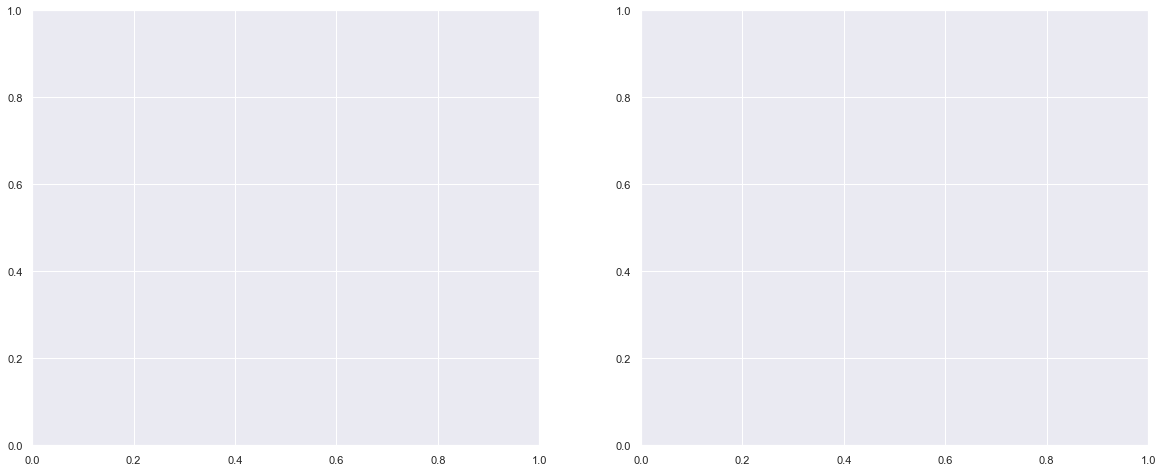

In [83]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 8))
plot_confusion_matrix(pipeline, X_train, y_train, ax=ax0)
plot_confusion_matrix(pipeline, X_test, y_test, ax=ax1)
ax0.title.set_text('Train Confusion Matrix')
ax1.title.set_text('Test Confusion Matrix')

In [ ]:
residuals = y_train == y_hat_train

print('Number of values correctly predicted:')
print(pd.Series(residuals).value_counts())

In [ ]:
residuals = y_test == y_hat_test

print('Number of values correctly predicted: ')
print(pd.Series(residuals).value_counts())

# Random Forest with Pipelines

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([('ss', StandardScaler()),
                     ('RF', RandomForestClassifier(random_state=42))])

pipeline.fit(X_train, y_train)


train_preds = pipeline.predict(X_train)
test_preds = pipeline.predict(X_test)

print(classification_report(y_train, train_preds))
print(classification_report(y_test, test_preds))

In [ ]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 8))
plot_confusion_matrix(pipeline, X_train, y_train, ax=ax0)
plot_confusion_matrix(pipeline, X_test, y_test, ax=ax1)
ax0.title.set_text('Train Confusion Matrix')
ax1.title.set_text('Test Confusion Matrix')

In [ ]:
import pickle

# make sure your model has already been fit before you pickle it!!
pickle.dump(pipeline, open("model.pkl", "wb"))

# Combining GridSearch+Random Forest with Pipelines

In [ ]:
# defining pipeline + setting up grid for gridsearch w Random Forest
pipeline2 = Pipeline([('ss', StandardScaler()), 
                              ('RF', RandomForestClassifier(random_state=42))])

grid = [{'RF__max_depth': [4, 5], 
         'RF__min_samples_split': [5, 10], 
         'RF__min_samples_leaf': [3, 5]}]


# perform gridsearch
gridsearch = GridSearchCV(estimator=pipeline2, 
                          param_grid=grid, 
                          scoring='accuracy', 
                          cv=5)

gridsearch.fit(X_train, y_train)
test_preds = gridsearch.predict(X_test)


gridsearch.best_params_

In [ ]:
gridsearch.best_estimator_['RF'].feature_importances_

In [ ]:
plot_confusion_matrix(gridsearch, X_test, y_test)

In [ ]:
from sklearn.metrics import classification_report

train_preds = gridsearch.predict(X_train)
test_preds = gridsearch.predict(X_test)

print(classification_report(y_train, train_preds))
print(classification_report(y_test, test_preds))

In [ ]:
import pickle

# make sure your model has already been fit before you pickle it!!
pickle.dump(gridsearch, open("model.pkl", "wb"))

# Conclusions
+ Procedural Programming: hard coded values and parameters, save multiple objects or data structure